In [1]:
#Import basic necessary datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell #To print multiple outputs
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
#Read the datasets and view the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')
train.shape
train.head()
test.shape
test.head()

(43400, 12)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


(18601, 11)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,36306,Male,80.0,0,0,Yes,Private,Urban,83.84,21.1,formerly smoked
1,61829,Female,74.0,0,1,Yes,Self-employed,Rural,179.50,26.0,formerly smoked
2,14152,Female,14.0,0,0,No,children,Rural,95.16,21.2,NaN
3,12997,Male,28.0,0,0,No,Private,Urban,94.76,23.4,NaN
4,40801,Female,63.0,0,0,Yes,Govt_job,Rural,83.57,27.6,never smoked


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
id                   43400 non-null int64
gender               43400 non-null object
age                  43400 non-null float64
hypertension         43400 non-null int64
heart_disease        43400 non-null int64
ever_married         43400 non-null object
work_type            43400 non-null object
Residence_type       43400 non-null object
avg_glucose_level    43400 non-null float64
bmi                  41938 non-null float64
smoking_status       30108 non-null object
stroke               43400 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [4]:
train.isnull().sum()
test.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   591
smoking_status       5751
dtype: int64

In [5]:
train.bmi.fillna(value=train.bmi.median(), axis=0, inplace=True)
test.bmi.fillna(value=test.bmi.median(), axis=0, inplace=True)

In [6]:
train.smoking_status.fillna(value='no information', axis=0, inplace=True)
test.smoking_status.fillna(value='no information', axis=0, inplace=True)

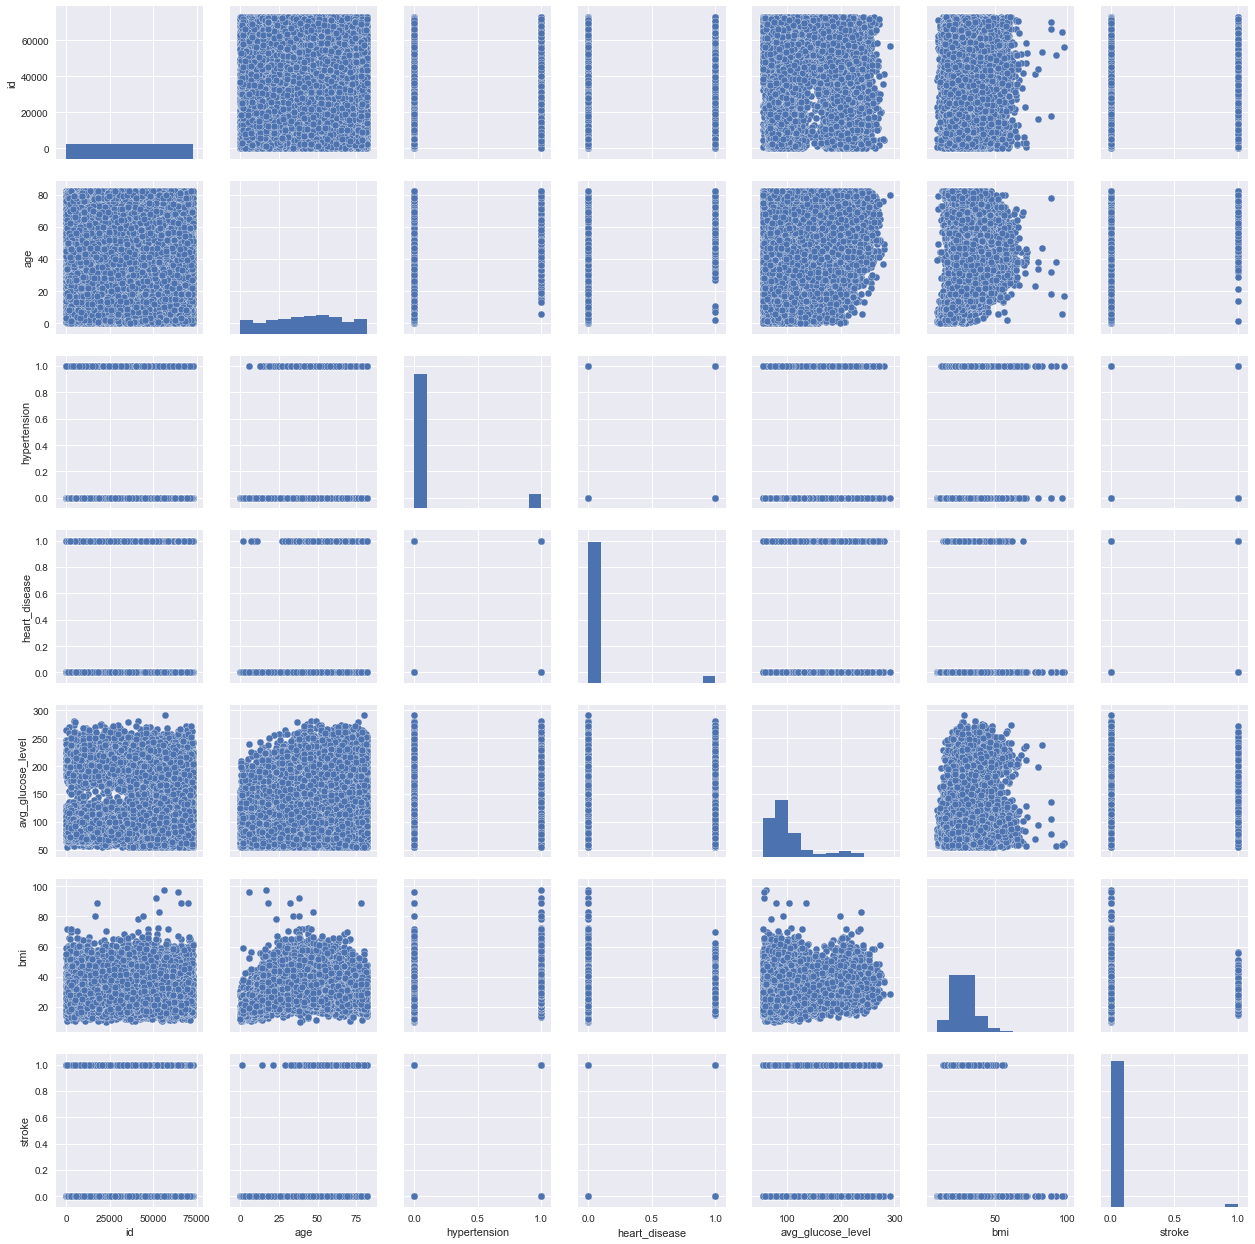

In [7]:
import seaborn as sns
sns.pairplot(train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


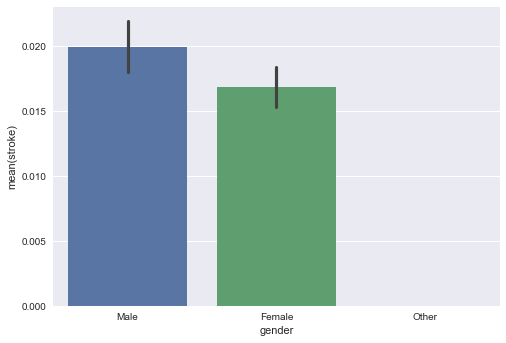

In [8]:
sns.barplot(x='gender',y='stroke',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


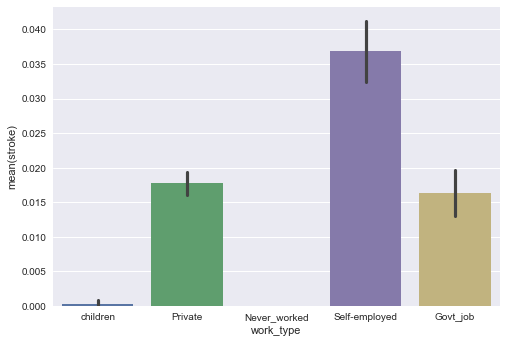

In [9]:
sns.barplot(x='work_type',y='stroke',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


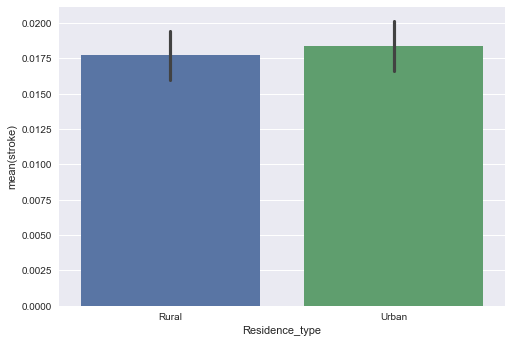

In [10]:
sns.barplot(x='Residence_type',y='stroke',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


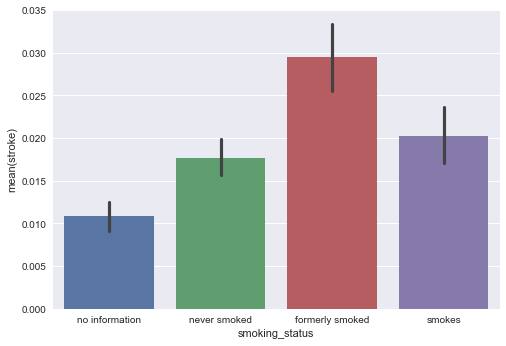

In [11]:
sns.barplot(x='smoking_status',y='stroke',data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


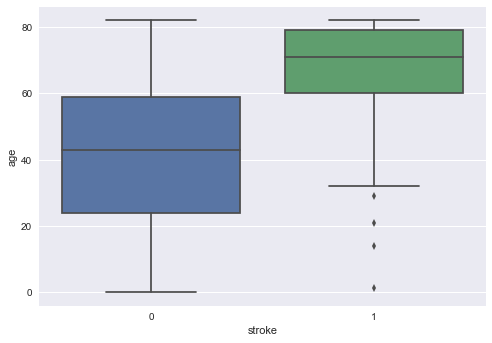

In [12]:
sns.boxplot(x='stroke', y='age', data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


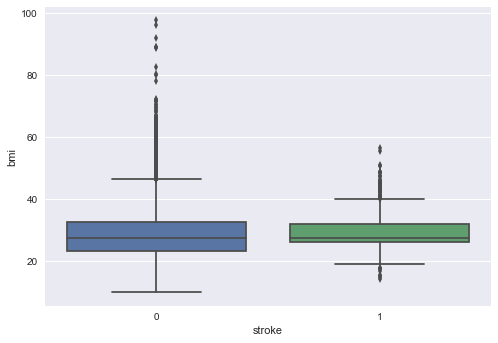

In [13]:
sns.boxplot(x='stroke', y='bmi', data=train)

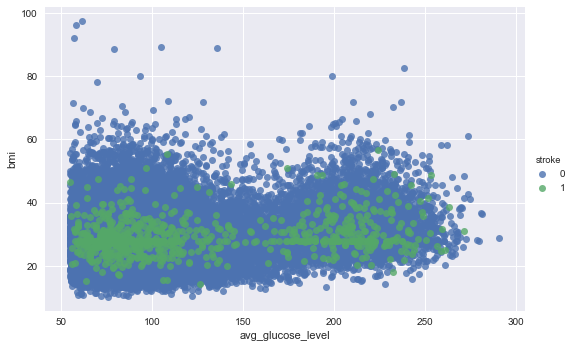

In [14]:
sns.lmplot(x='avg_glucose_level', y='bmi', hue = 'stroke', data=train, aspect=1.5, ci = None, fit_reg = False)
plt.show()

In [15]:
train.age = np.digitize(train.age, bins=np.arange(start=train.age.min(),stop=train.age.max(),step=10))
test.age = np.digitize(test.age, bins=np.arange(start=test.age.min(),stop=test.age.max(),step=10))

In [16]:
train.avg_glucose_level = np.digitize(train.avg_glucose_level, bins=np.arange(start=train.avg_glucose_level.min(),stop=train.avg_glucose_level.max(),step=50))
test.avg_glucose_level = np.digitize(test.avg_glucose_level, bins=np.arange(start=test.avg_glucose_level.min(),stop=test.avg_glucose_level.max(),step=50))

In [17]:
train.bmi = np.digitize(train.bmi, bins=np.arange(start=train.bmi.min(),stop=train.bmi.max(),step=10))
test.bmi = np.digitize(test.bmi, bins=np.arange(start=test.bmi.min(),stop=test.bmi.max(),step=10))

In [18]:
train.bmi[train.bmi.isin([7,8,9])] = 6
test.bmi[test.bmi.isin([7,8,9])] = 6

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [19]:
train.drop(columns=['id'], inplace=True)
test.drop(columns=['id'], inplace=True)

In [20]:
train = pd.get_dummies(train, columns=['gender','age','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status'],drop_first=True)
test = pd.get_dummies(test, columns=['gender','age','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status'],drop_first=True)

In [21]:
train.head()

,hypertension,heart_disease,stroke,gender_Male,gender_Other,age_2,age_3,age_4,age_5,age_6,...,avg_glucose_level_4,avg_glucose_level_5,bmi_2,bmi_3,bmi_4,bmi_5,bmi_6,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [22]:
test.head()

,hypertension,heart_disease,gender_Male,gender_Other,age_2,age_3,age_4,age_5,age_6,age_7,...,avg_glucose_level_4,avg_glucose_level_5,bmi_2,bmi_3,bmi_4,bmi_5,bmi_6,smoking_status_never smoked,smoking_status_no information,smoking_status_smokes
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [23]:
train.columns
test.columns

Index(['hypertension', 'heart_disease', 'stroke', 'gender_Male',
       'gender_Other', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7',
       'age_8', 'age_9', 'ever_married_Yes', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'Residence_type_Urban', 'avg_glucose_level_2', 'avg_glucose_level_3',
       'avg_glucose_level_4', 'avg_glucose_level_5', 'bmi_2', 'bmi_3', 'bmi_4',
       'bmi_5', 'bmi_6', 'smoking_status_never smoked',
       'smoking_status_no information', 'smoking_status_smokes'],
      dtype='object')

Index(['hypertension', 'heart_disease', 'gender_Male', 'gender_Other', 'age_2',
       'age_3', 'age_4', 'age_5', 'age_6', 'age_7', 'age_8', 'age_9',
       'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban',
       'avg_glucose_level_2', 'avg_glucose_level_3', 'avg_glucose_level_4',
       'avg_glucose_level_5', 'bmi_2', 'bmi_3', 'bmi_4', 'bmi_5', 'bmi_6',
       'smoking_status_never smoked', 'smoking_status_no information',
       'smoking_status_smokes'],
      dtype='object')

In [24]:
#Take independent features into x and depenent feature into y
X = train.drop('stroke',axis=1)
y = train.stroke

In [25]:
# import np_utils
#from keras.utils import np_utils
#y = np_utils.to_categorical(y)

In [26]:
X.shape
y.shape

(43400, 30)

(43400,)

In [27]:
#train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

X_train.shape
X_test.shape
y_train.shape
y_test.shape

(34720, 30)

(8680, 30)

(34720,)

(8680,)

In [39]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
def build_classifier():
    classifier = Sequential()  # initiate the model
    classifier.add(Dense(200, input_shape=(30,), activation='relu')) # input layer
    classifier.add(Dense(100, activation='relu'))                  # hidden layer
    classifier.add(Dense(1, activation = 'sigmoid')) #output layer
    classifier.compile(loss = 'binary_crossentropy', optimizer = Adam(lr=0.003), metrics = ['accuracy'])
    return classifier

In [40]:
classifier = KerasClassifier(build_fn=build_classifier, batch_size=10, nb_epoch=10)

In [ ]:
accuracies = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1)

In [ ]:
accuracies.mean()
accuracies.std()

In [34]:
from sklearn import metrics
y_pred = classifier.predict(X_test)
y_pred
metrics.accuracy(y_test,y_pred)

array([[  5.99427521e-03],
       [  7.63076358e-04],
       [  1.95509065e-02],
       ..., 
       [  1.31667413e-10],
       [  5.19211590e-03],
       [  2.14060899e-02]], dtype=float32)

0.83529830801295157

In [35]:
test_pred = hidden_model.predict(test)
test_pred
sample['stroke'] = test_pred
sample.head()
sample.to_csv('sample_submission.csv',index=False)

array([[  5.38387857e-02],
       [  1.16287321e-01],
       [  1.59797995e-19],
       ..., 
       [  4.53784131e-02],
       [  2.50795879e-03],
       [  7.23606907e-04]], dtype=float32)

,id,stroke
0,36306,5.383879e-02
1,61829,1.162873e-01
2,14152,1.597980e-19
3,12997,6.941439e-06
4,40801,2.471309e-03


In [36]:
sample.stroke.min()
sample.stroke.max()

3.8095959e-25

0.30306605